In [ ]:
!nvidia-smi

Thu May  2 12:52:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/DataSets/ColorsData/data.yaml epochs=200 imgsz=640 optimizer='auto' batch=8 val=True patience=10

100% 6.23M/6.23M [00:00<00:00, 85.6MB/s]
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DataSets/ColorsData/data.yaml, epochs=200, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/DataSets/ColorsData/data.yaml epochs=200 imgsz=640

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/DataSets/ColorsData/valid/labels.cache... 239 images, 0 backgrounds, 59 corrupt: 100% 239/239 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/DataSets/ColorsData/valid/images/beige-28-_jpg.rf.033d20bb0e64020c527a4199ca514e16.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0004      1.0008]
val: WARNING ⚠️ /content/drive/MyDrive/DataSets/ColorsData/valid/images/beige-42-_jpg.rf.aaf227f144e5836f83b57e058baddad7.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [          1]
val: WARNING ⚠️ /content/drive/MyDrive/DataSets/ColorsData/valid/images/beige-54-_jpg.rf.eb8b0590b3c72e46e373bfe0bd09188c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [          1]
val: WARNING ⚠️ /content/drive

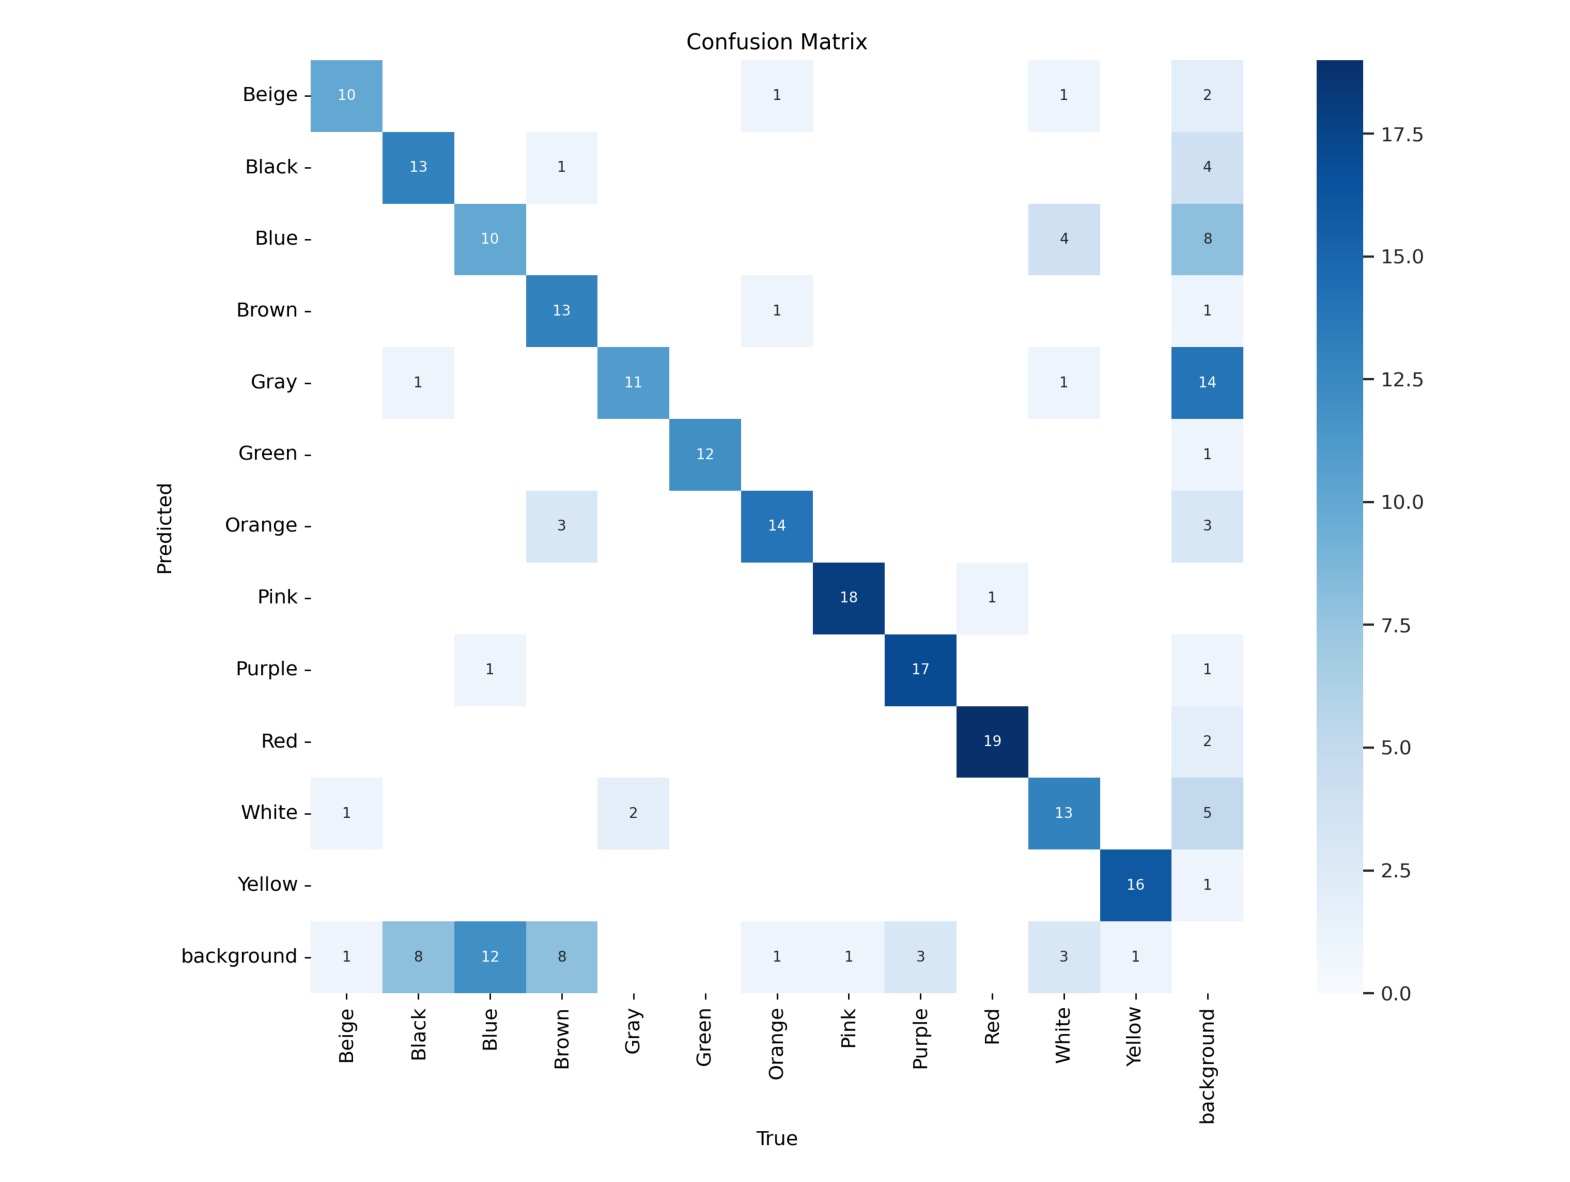

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/confusion_matrix.png'
image = Image.open(image_path)
plt.figure(figsize=(20, 18))
plt.imshow(image)
plt.axis('off')
plt.show()

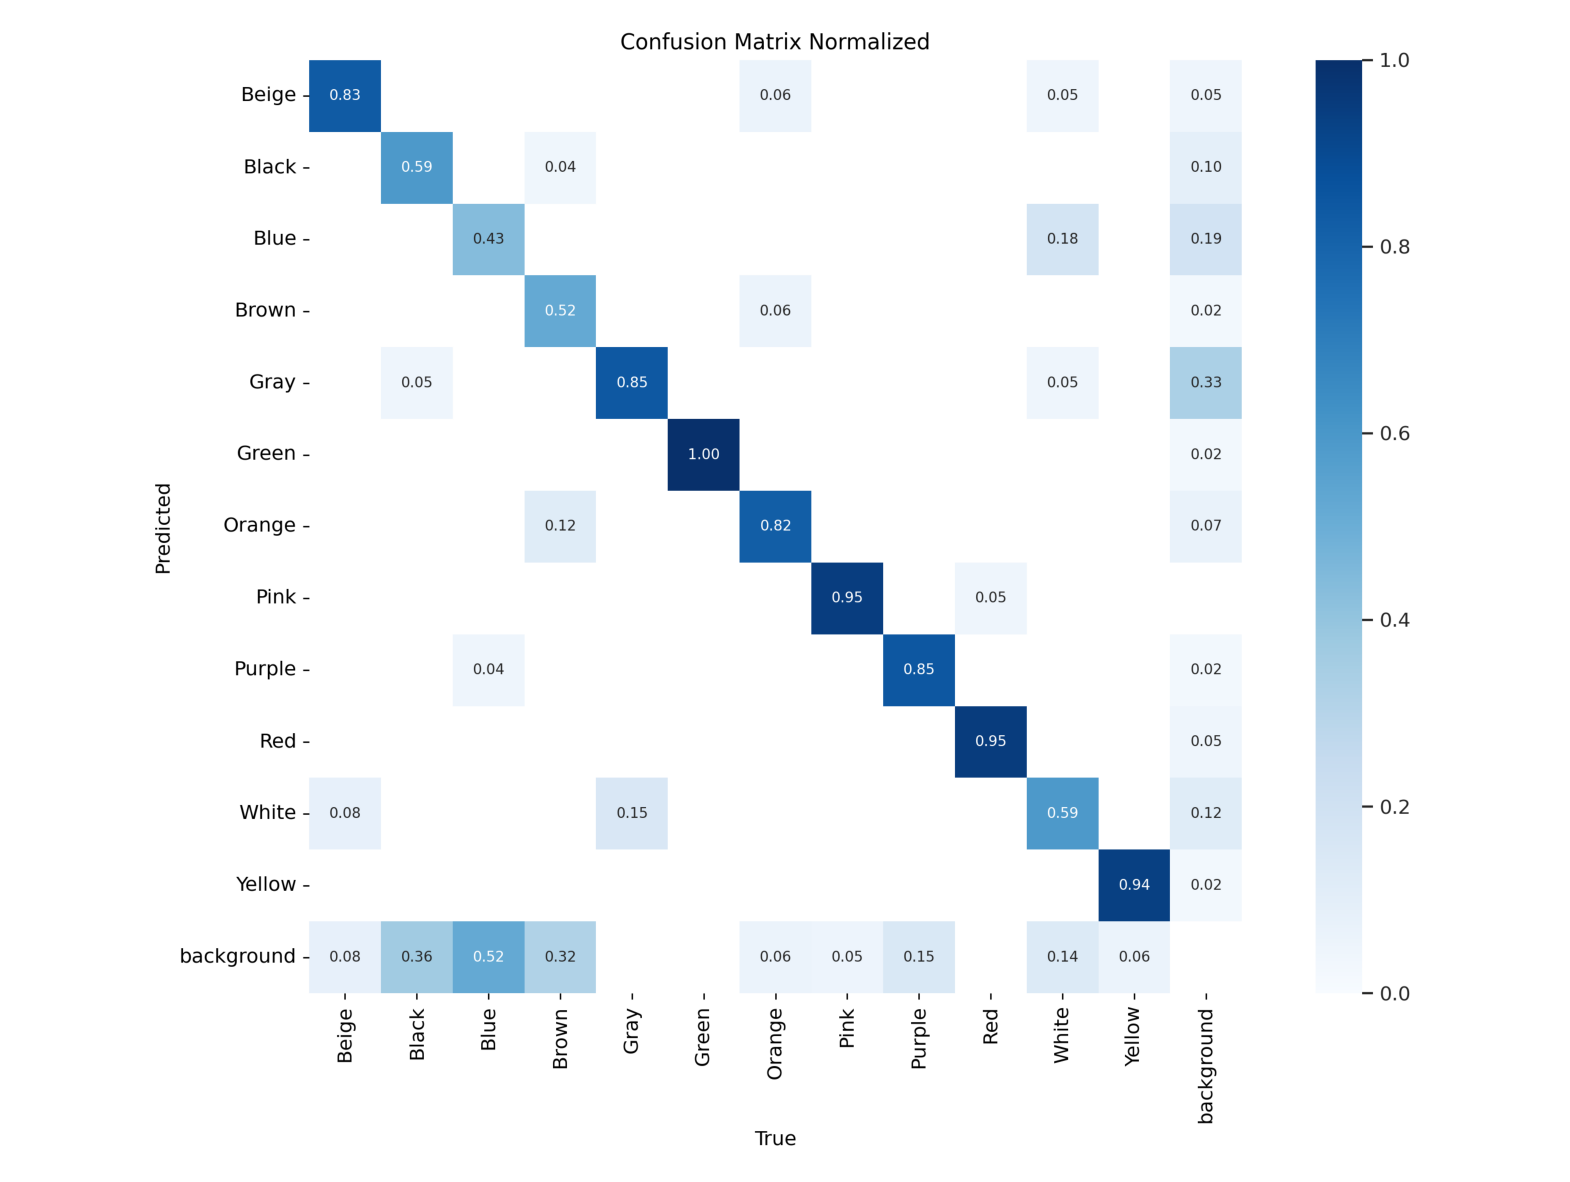

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/confusion_matrix_normalized.png'
image = Image.open(image_path)

plt.figure(figsize=(20, 20))  # Set the figure size to 8x6 inches
plt.imshow(image)
plt.axis('off')
plt.show()

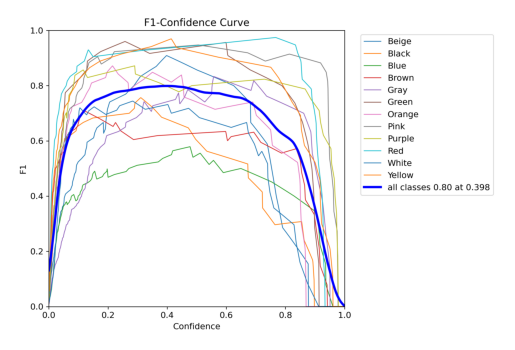

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/F1_curve.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

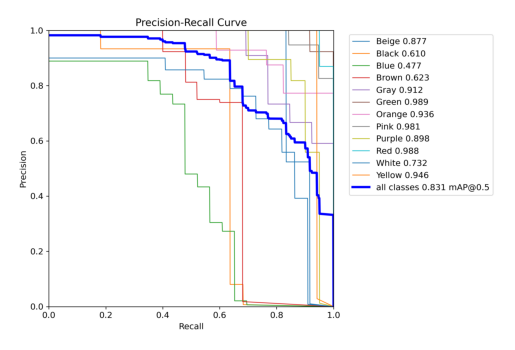

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/PR_curve.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

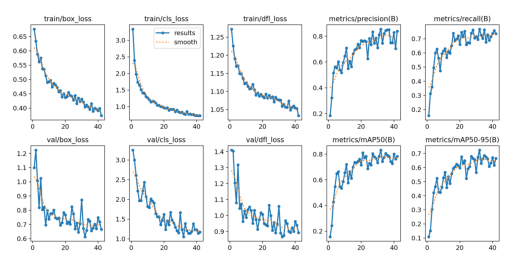

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/results.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

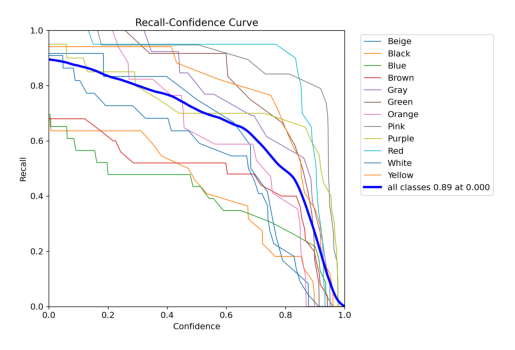

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/R_curve.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/redd.jpeg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/redd.jpeg: 608x640 1 Red, 65.4ms
Speed: 5.4ms preprocess, 65.4ms inference, 2066.3ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/gree.jpeg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/gree.jpeg: 608x640 1 Green, 61.1ms
Speed: 4.0ms preprocess, 61.1ms inference, 2114.1ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/blu.jpeg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/blu.jpeg: 608x640 1 Blue, 61.9ms
Speed: 4.1ms preprocess, 61.9ms inference, 2123.5ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/orang.jpeg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/orang.jpeg: 608x640 1 Orange, 62.5ms
Speed: 5.0ms preprocess, 62.5ms inference, 2056.7ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/yello.jpeg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/yello.jpeg: 608x640 1 Yellow, 67.7ms
Speed: 5.2ms preprocess, 67.7ms inference, 2784.6ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/brow.jpeg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/brow.jpeg: 608x640 1 Brown, 62.7ms
Speed: 4.1ms preprocess, 62.7ms inference, 2519.5ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
### real image

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/realimage/reelblu.jpg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/realimage/reelblu.jpg: 480x640 1 Blue, 1 White, 62.0ms
Speed: 2.9ms preprocess, 62.0ms inference, 1918.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/realimage/reelgre.jpg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/realimage/reelgre.jpg: 640x480 2 Greens, 62.1ms
Speed: 3.0ms preprocess, 62.1ms inference, 1950.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/realimage/reelre.jpg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/realimage/reelre.jpg: 640x480 1 Red, 61.0ms
Speed: 2.9ms preprocess, 61.0ms inference, 2258.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/realimage/reelwhitee.jpg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/realimage/reelwhitee.jpg: 640x480 1 Gray, 1 White, 63.3ms
Speed: 3.0ms preprocess, 63.3ms inference, 2798.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict10
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/realimage/reelyello.jpg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/realimage/reelyello.jpg: 480x640 1 Gray, 2 Whites, 1 Yellow, 61.0ms
Speed: 2.8ms preprocess, 61.0ms inference, 1970.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict11
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/realimage/reelor.jpg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/realimage/reelor.jpg: 640x480 1 Orange, 103.9ms
Speed: 4.1ms preprocess, 103.9ms inference, 2250.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict12
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/realimage/reelpur.jpg

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/realimage/reelpur.jpg: 640x480 1 Black, 105.8ms
Speed: 4.3ms preprocess, 105.8ms inference, 2738.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict13
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
Bfrom PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/val_batch1_labels.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (<ipython-input-28-de17f8171f9e>, line 1)

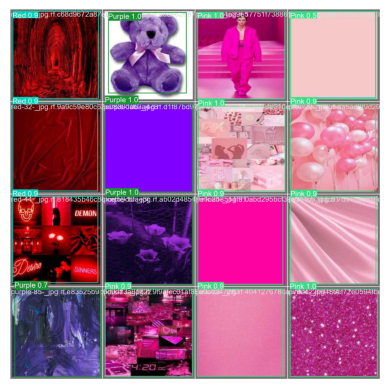

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/val_batch1_pred.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

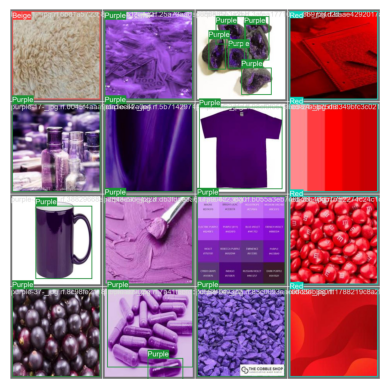

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/val_batch0_labels.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

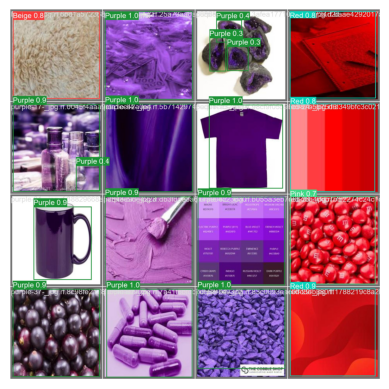

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/train/val_batch0_pred.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

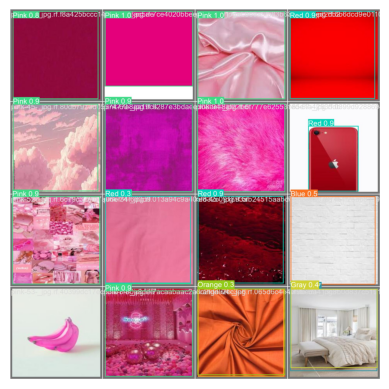

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val/val_batch2_pred.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' source=/content/drive/MyDrive/DataSets/ColorsData/test/images conf=0.25 save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 555, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 240, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 806, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 732, in torch_safe_load
    ckpt = torch.load(fi